# Analysing Swiggy (Bangalore)

### Bangalore Swiggy outlet Dataset

#### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import re
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Loading the dataset

In [ ]:
df = pd.read_csv("Swiggy Bangalore Outlet Details.csv")
df.head(26)

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,₹ 350
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,₹ 200
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,₹ 500
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,₹ 350
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,₹ 150


In [ ]:
df.dtypes

Shop_Name       object
Cuisine         object
Location        object
Rating          object
Cost_for_Two    object
dtype: object

In [ ]:
df.columns

Index(['Shop_Name', 'Cuisine', 'Location', 'Rating', 'Cost_for_Two'], dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=118, step=1)

### Cleaning poorly formatted columns

Removing rupee symbol in cost.

In [ ]:
df["Cost_for_Two"] = df["Cost_for_Two"].apply(lambda x: x.replace("₹ ","")).astype(float)

Creating a new column as Cost_for_One

In [ ]:
df["Cost_for_One"] = df["Cost_for_Two"].apply(lambda x: x/2)

Seperating the 'location spot' & 'Area' from the column 'Location'

In [ ]:
regex = r'[,]\s([a-zA-Z0-9]+)'
df['Area'] = df['Location'].apply(lambda x: re.compile(regex).findall(x))
regex = r'(.*?),'
df['Location'] = df['Location'].apply(lambda x:re.compile(regex).findall(x))
df = df.rename(columns = {"Location":"Area spot"})

cleaning and changing the columns format

In [ ]:
df['Area spot'] = df['Area spot'].apply(lambda x: ''.join(x))
df['Area'] = df['Area'].apply(lambda x: ''.join(x))

Arranging the columns

In [ ]:
columns = ['Shop_Name', 'Cuisine', 'Rating', 'Cost_for_One', 'Area', 'Area spot']
df = df[columns]

In [ ]:
df.head()

,Shop_Name,Cuisine,Rating,Cost_for_One,Area,Area spot
0,Kanti Sweets,Sweets,4.3,75.0,Koramangala,Koramangala
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo",4.4,200.0,HSR,Sector 5
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...",4.1,63.0,Koramangala,6th Block
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...",4.4,200.0,HSR,HSR
4,Beijing Bites,"Chinese, Thai",4.1,225.0,Koramangala,5th Block


## Data Cleaning

#### Finding missing values

In [ ]:
def null_values(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([Total,Percentage],axis=1,keys=['Total','Percentage'])
null_values(df)

,Total,Percentage
Shop_Name,0,0.0
Cuisine,0,0.0
Rating,0,0.0
Cost_for_One,0,0.0
Area,0,0.0
Area spot,0,0.0


- There are no missing values 

#### Deleting duplicates

In [ ]:
df = df.drop_duplicates(keep='first')

Converting the datatypes of different columns as required

In [ ]:
# When converting Rating columns to float it gave an error that '--' can't be converted
# So the missing values are represented as '--' in this dataset.
# Finding and filling the missing values
a = df['Rating'].mode()[0]
df['Rating'] = df['Rating'].apply(lambda x: x.replace('--',a))

In [ ]:
df['Rating'] = df['Rating'].astype(float)

In [ ]:
df.dtypes

Shop_Name        object
Cuisine          object
Rating          float64
Cost_for_One    float64
Area             object
Area spot        object
dtype: object

## Analysing the data

## 1) No. of Shops based on Area

In [ ]:
location = df['Area'].value_counts().sort_values(ascending=False)
location = location.reset_index().rename(columns={'index':'Location','Area':'No. of Shops'})
location

,Location,No. of Shops
0,Koramangala,63
1,BTM,33
2,HSR,16
3,Jayanagar,1
4,2ndBTM,1
5,StageBTM,1
6,SectorHSRHSR,1
7,5thNearKoramangala,1
8,TeacherJakkasandraHSR,1


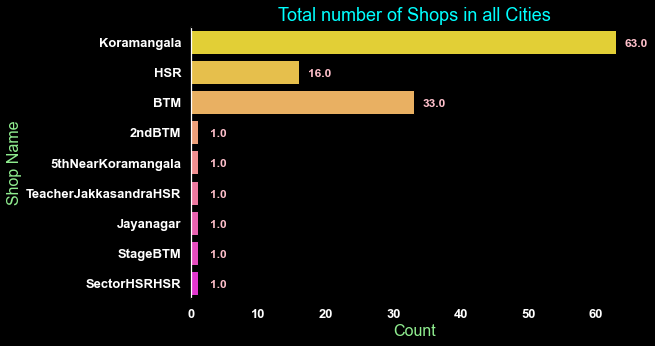

In [ ]:
plt.figure(facecolor='black',figsize=(8,5))
sns.set(rc={'figure.figsize':(8,5)})
a = sns.countplot(y ='Area',data=df,palette='spring_r',edgecolor='black')
plt.xticks(rotation=0,fontsize=13,fontweight='bold',color='white')
plt.yticks(fontsize=13,fontweight='bold',color='white')
for p in a.patches:
    width = p.get_width()
    plt.text(3+p.get_width(),p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),ha='center',
             va='center',fontsize=12,color='pink',fontweight='bold')
a.set_xlabel("Count", fontsize = 16,color='lightgreen')
a.set_ylabel("Shop Name", fontsize =16, color='lightgreen')
plt.title("Total number of Shops in all Cities",fontsize=18,color='cyan')
a.set_facecolor('black')
a.spines['left'].set_color('white')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

### 2) Top 10 Shop Names with highest rating

In [ ]:
by_rating = df.sort_values(by='Rating',ascending=False).head(10).reset_index()
by_rating.drop('index',axis=1,inplace=True)
by_rating

,Shop_Name,Cuisine,Rating,Cost_for_One,Area,Area spot
0,Khichdi Experiment,"Home Food, Healthy Food, Indian",4.8,100.0,Koramangala,Koramangala
1,Corner House Ice Cream,"Ice Cream, Desserts",4.6,125.0,Koramangala,7th Block
2,Natural Ice Cream,Ice Cream,4.6,75.0,Koramangala,Near Wipro Park Signal
3,Chinese Bae,"Chinese, Thai",4.5,225.0,BTM,BTM
4,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...",4.4,200.0,HSR,HSR
5,Bowl 99,"North Indian, South Indian",4.4,100.0,Koramangala,kormangala
6,China Pearl,"Chinese, Asian",4.4,263.5,Koramangala,6th Block
7,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo",4.4,200.0,HSR,Sector 5
8,Nagarjuna,"Andhra, South Indian",4.3,300.0,Koramangala,KHB Colony
9,Leon Grill,"Turkish, Portuguese, American",4.3,150.0,HSR,3rd Sector


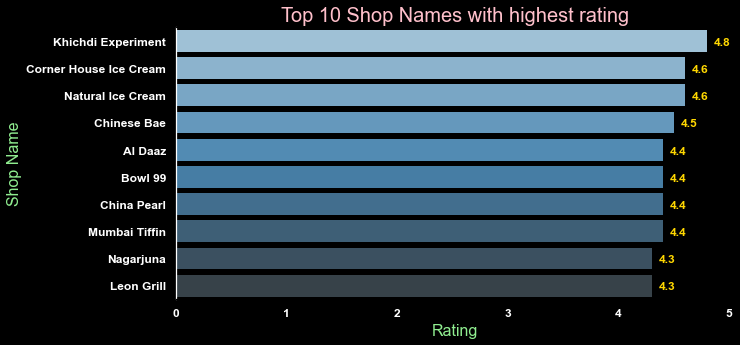

In [ ]:
plt.figure(facecolor='black',figsize=(10,5))
sns.set(rc={'figure.figsize':(10,5)})
a = sns.barplot(by_rating['Rating'],by_rating['Shop_Name'], palette = 'Blues_d',edgecolor='none')
a.set(xlabel='Rating', ylabel='Name of the Shop')
plt.xticks(rotation=0,fontsize=12,fontweight='bold',color='white')
plt.yticks(fontsize=12,fontweight='bold',color='white')
plt.title("Top 10 Shop Names with highest rating",fontsize=20,color='pink')
a.set_xlabel("Rating", fontsize = 16,color='lightgreen')
a.set_ylabel("Shop Name", fontsize =16, color='lightgreen')
for p in a.patches:
    width = p.get_width()
    plt.text(0.14 + p.get_width(), p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),
            ha = 'center', va = 'center', color = 'gold',fontweight='bold')
a.set_facecolor('black')
a.spines['left'].set_color('white')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

## 3) Price per item for top 10 Shops

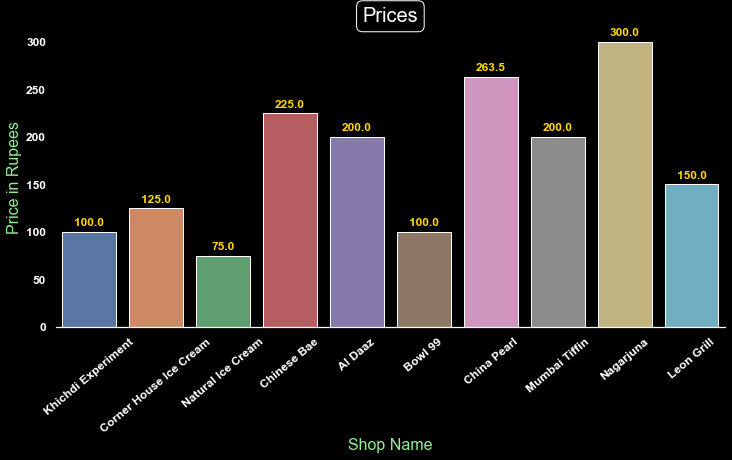

In [ ]:
plt.figure(facecolor='black',figsize=(12,5.5))
sns.set(rc={'figure.figsize':(12,5.5)})
plt.xticks(rotation=40,fontsize=12,fontweight='bold',color='white')
plt.yticks(fontsize=12,fontweight='bold',color='white')
a = sns.barplot(x = 'Shop_Name', y = 'Cost_for_One', data = by_rating)
plt.title("Prices",fontsize=20,color='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round', linewidth=1))
a.set_ylabel("Price in Rupees", fontsize = 16,color='lightgreen')
a.set_xlabel("Shop Name", fontsize =16, color='lightgreen')
for p in a.patches:
    a.annotate(format(p.get_height()), (p.get_x()+p.get_width()/2.,p.get_height()),
              ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points',weight='bold',color='gold')
    a.set_facecolor('black')
a.spines['left'].set_color('black')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('white')
a.spines['right'].set_color('black')
plt.grid(False)
plt.show()

In [ ]:
by_rating["Area"].unique()

array(['Koramangala', 'BTM', 'HSR'], dtype=object)

## 4) Location of top 10 Shops 

In [ ]:
groupby_area = by_rating.groupby(by ='Area')["Shop_Name"].value_counts()
groupby_area = groupby_area.to_frame().rename(columns={"Shop_Name":"Count"})
groupby_area 

Count
Area        Shop_Name                    
BTM         Chinese Bae                 1
HSR         Al Daaz                     1
            Leon Grill                  1
            Mumbai Tiffin               1
Koramangala Bowl 99                     1
            China Pearl                 1
            Corner House Ice Cream      1
            Khichdi Experiment          1
            Nagarjuna                   1
            Natural Ice Cream           1

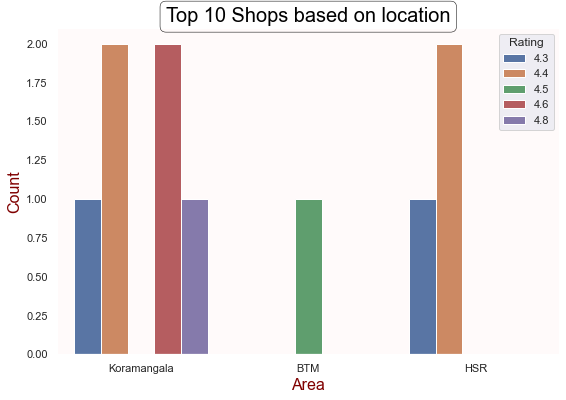

In [ ]:
sns.set(rc={'figure.figsize':(9,6)})
a = sns.countplot(x=by_rating["Area"],hue=by_rating['Rating'])
plt.legend(loc='upper right',title='Rating')
plt.title("Top 10 Shops based on location",fontsize=20,color='black',
          bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
a.set_ylabel("Count", fontsize = 16,color='maroon')
a.set_xlabel("Area", fontsize =16, color='maroon')
a.set_facecolor('snow')
plt.grid(False)

## 5) Top 10 mostly available Cuisines

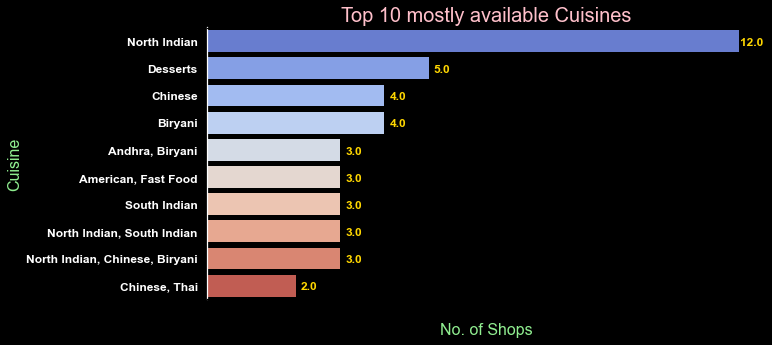

In [ ]:
list1=[]
for i in df['Cuisine']:
    list1.append(i)
a = pd.Series(list1).value_counts()[:10]
b = a.reset_index().rename(columns={'index':'Cuisine',0:'Count'})
plt.figure(facecolor='black',figsize=(10,5))
sns.set(rc={'figure.figsize':(10,5)})
a = sns.barplot(y='Cuisine',x='Count',data=b, palette = 'coolwarm',edgecolor='none')
a.set(xlabel='Rating', ylabel='Name of the Shop')
plt.xticks(rotation=0,fontsize=12,fontweight='bold',color='black')
plt.yticks(fontsize=12,fontweight='bold',color='white')
plt.title("Top 10 mostly available Cuisines",fontsize=20,color='pink')
a.set_xlabel("No. of Shops", fontsize = 16,color='lightgreen')
a.set_ylabel("Cuisine", fontsize =16, color='lightgreen')
for p in a.patches:
    width = p.get_width()
    plt.text(0.3 + p.get_width(), p.get_y()+0.55*p.get_height(),'{:1.1f}'.format(width),
            ha = 'center', va = 'center', color = 'gold',fontweight='bold')
a.set_facecolor('black')
a.spines['left'].set_color('white')
a.spines['top'].set_color('black')
a.spines['bottom'].set_color('black')
a.spines['right'].set_color('black')
plt.grid(False)

## 6) Rating of all the shops in 'Koramangala'

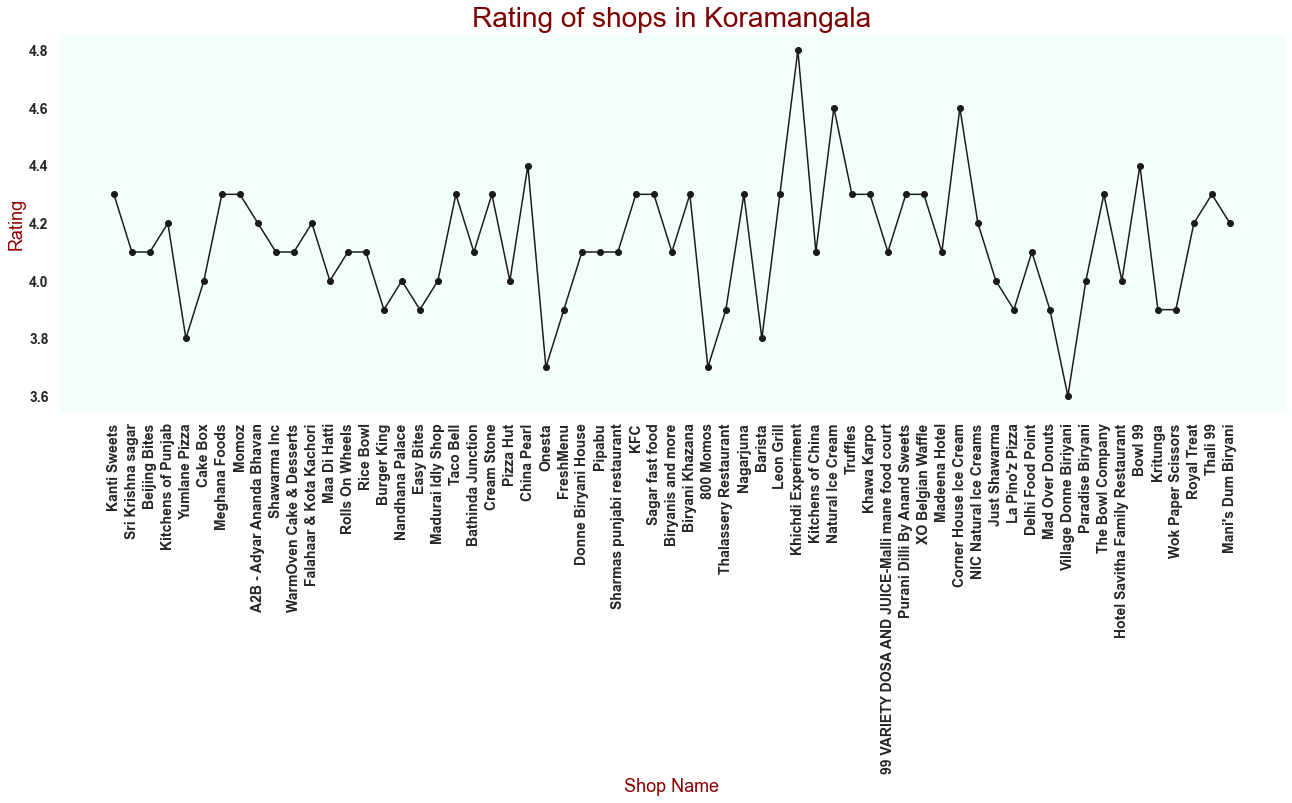

In [ ]:
koramangala = df.loc[(df['Area']=='Koramangala')]
sns.set(rc={'figure.figsize':(22,7)})
fig, ax = plt.subplots()
ax.set_facecolor('mintcream')
plt.plot('Shop_Name','Rating',data=koramangala,color='k')
plt.scatter('Shop_Name','Rating',data=koramangala,color='k')
plt.xticks(rotation=90,fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')

plt.title("Rating of shops in Koramangala",fontsize=28,color='maroon')
plt.xlabel("Shop Name", fontsize = 18,color='darkred')
plt.ylabel("Rating", fontsize =18, color='darkred')
plt.grid(False)

## 7) Cost of one item in different shops in Koramangala

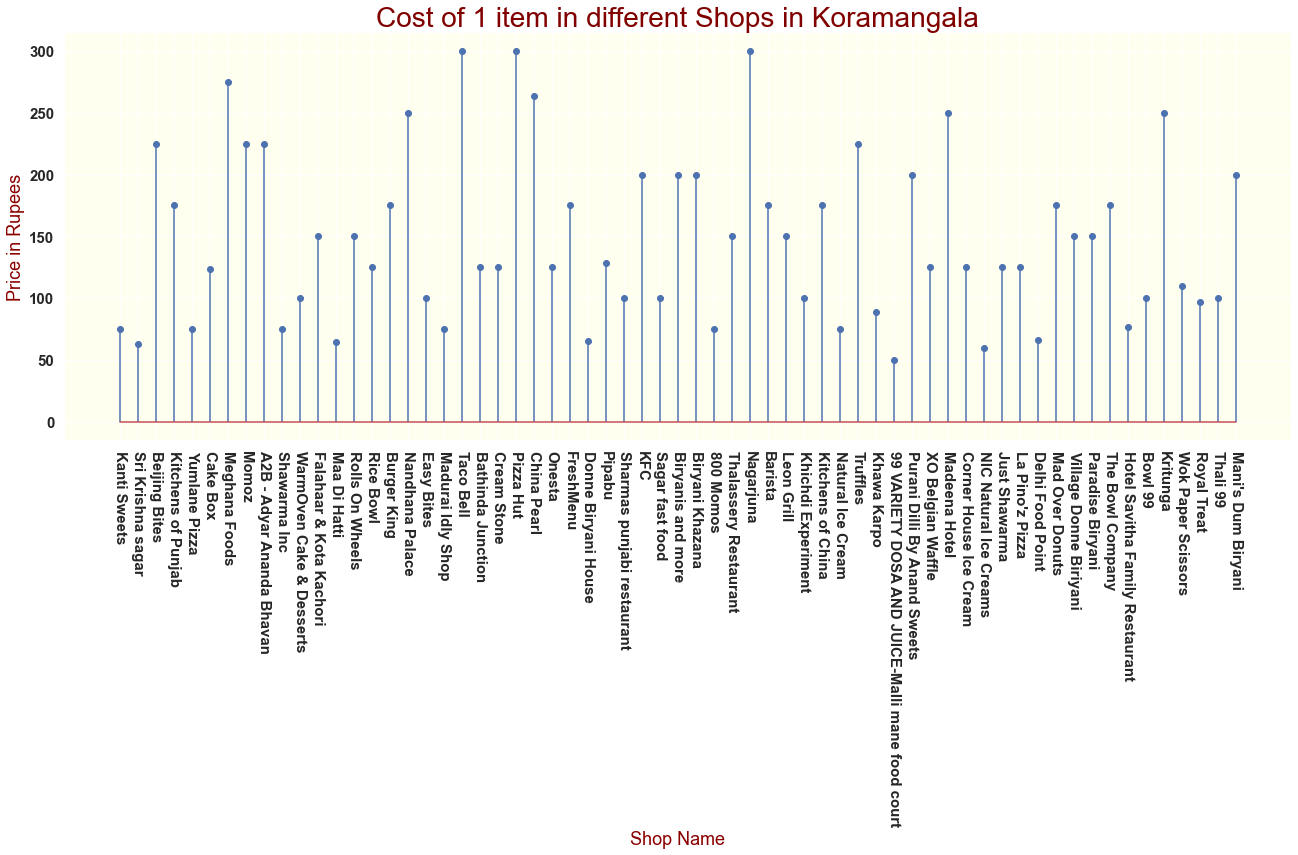

In [ ]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('ivory')
plt.stem('Shop_Name','Cost_for_One',data=koramangala)
plt.xticks(rotation=270,fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.title("Cost of 1 item in different Shops in Koramangala",fontsize=28,color='maroon')
plt.ylabel("Price in Rupees", fontsize = 18,color='darkred')
plt.xlabel("Shop Name", fontsize =18, color='darkred')
plt.show()

## 8) Top 10 Shops in "Koramangala"

In [ ]:
top_10_by_rating1 = koramangala.sort_values('Rating',ascending=False)
top_10_by_rating1.head(10)

,Shop_Name,Cuisine,Rating,Cost_for_One,Area,Area spot
78,Khichdi Experiment,"Home Food, Healthy Food, Indian",4.8,100.0,Koramangala,Koramangala
94,Corner House Ice Cream,"Ice Cream, Desserts",4.6,125.0,Koramangala,7th Block
82,Natural Ice Cream,Ice Cream,4.6,75.0,Koramangala,Near Wipro Park Signal
111,Bowl 99,"North Indian, South Indian",4.4,100.0,Koramangala,kormangala
48,China Pearl,"Chinese, Asian",4.4,263.5,Koramangala,6th Block
0,Kanti Sweets,Sweets,4.3,75.0,Koramangala,Koramangala
85,Truffles,American,4.3,225.0,Koramangala,5th Block
43,Cream Stone,Desserts,4.3,125.0,Koramangala,5th Block
59,Sagar fast food,"Chinese, South Indian, North Indian, Fast Food",4.3,100.0,Koramangala,8TH BLOCK
34,Taco Bell,Mexican,4.3,300.0,Koramangala,6th Block


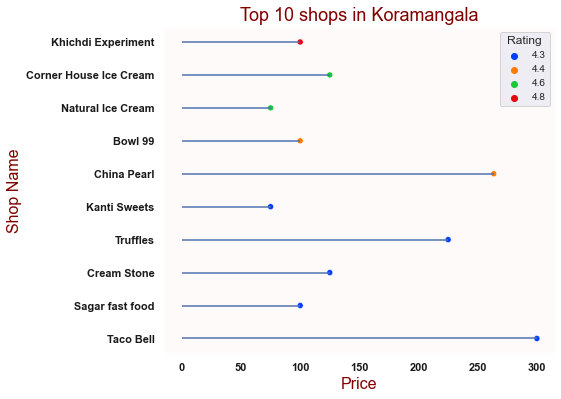

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
a = sns.scatterplot(x='Cost_for_One',y='Shop_Name',hue='Rating',data=top_10_by_rating1.head(10),palette='bright')
plt.hlines(xmin=0,xmax='Cost_for_One',y='Shop_Name',data=top_10_by_rating1.head(10))
a.set_ylabel("Shop Name", fontsize = 16,color='maroon')
a.set_xlabel("Price", fontsize =16, color='maroon')
a.set_title("Top 10 shops in Koramangala", fontsize =18, color='maroon')
a.set_facecolor('snow')
plt.xticks(rotation = 0,fontsize=11,color='k',fontweight='bold')
plt.yticks(fontsize=11,color='k',fontweight='bold')
plt.legend(loc='upper right',title='Rating',prop={'size': 10})
a.grid(False)
plt.show()

## 9) Rating of all the shops in 'BTM'

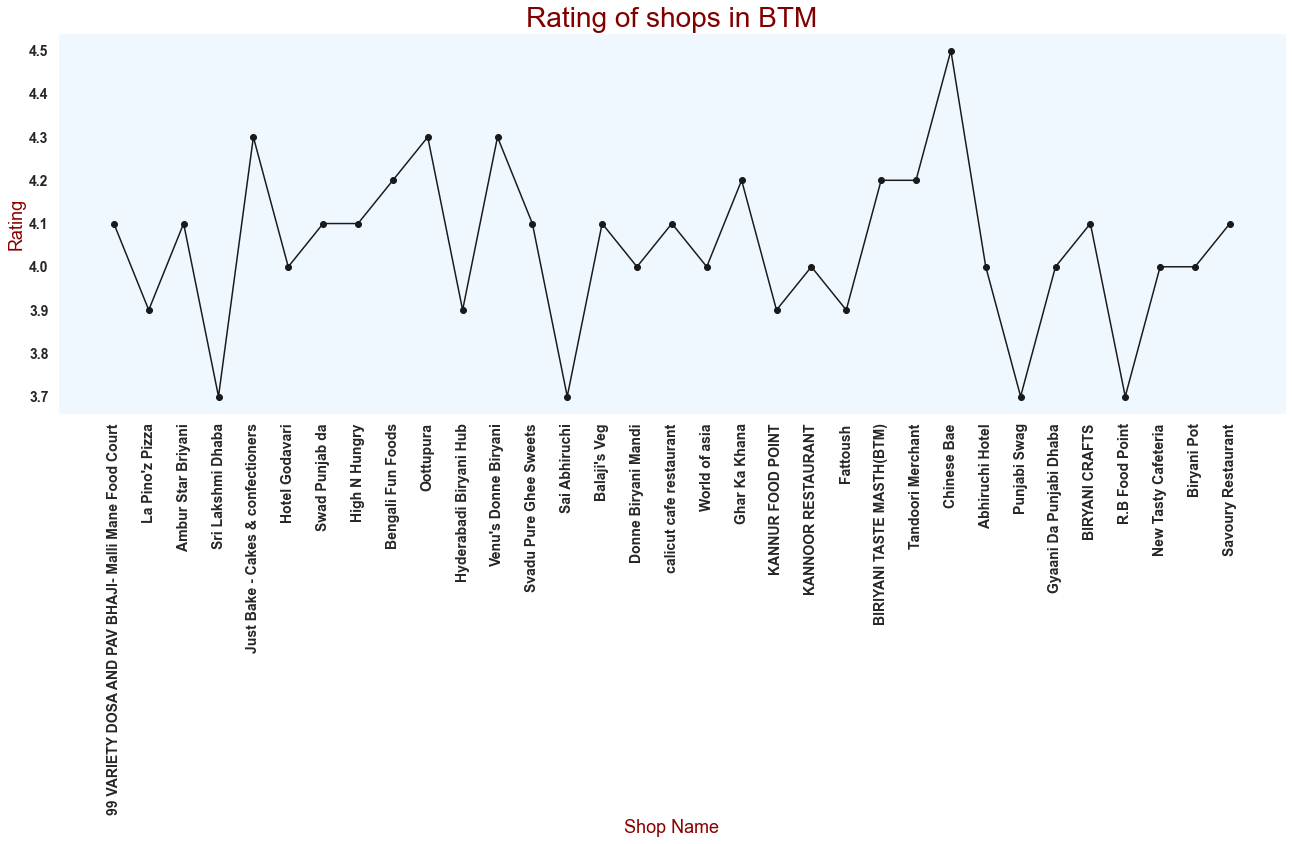

In [ ]:
BTM = df.loc[(df['Area']=='BTM')]
sns.set(rc={'figure.figsize':(22,7)})
fig, ax = plt.subplots()
ax.set_facecolor('aliceblue')
plt.plot('Shop_Name','Rating',data=BTM,color='k')
plt.scatter('Shop_Name','Rating',data=BTM,color='k')
plt.xticks(rotation=90,fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')

plt.title("Rating of shops in BTM",fontsize=28,color='maroon')
plt.xlabel("Shop Name", fontsize = 18,color='darkred')
plt.ylabel("Rating", fontsize =18, color='darkred')
plt.grid(False)

## 10) Cost of one item in different shops in BTM

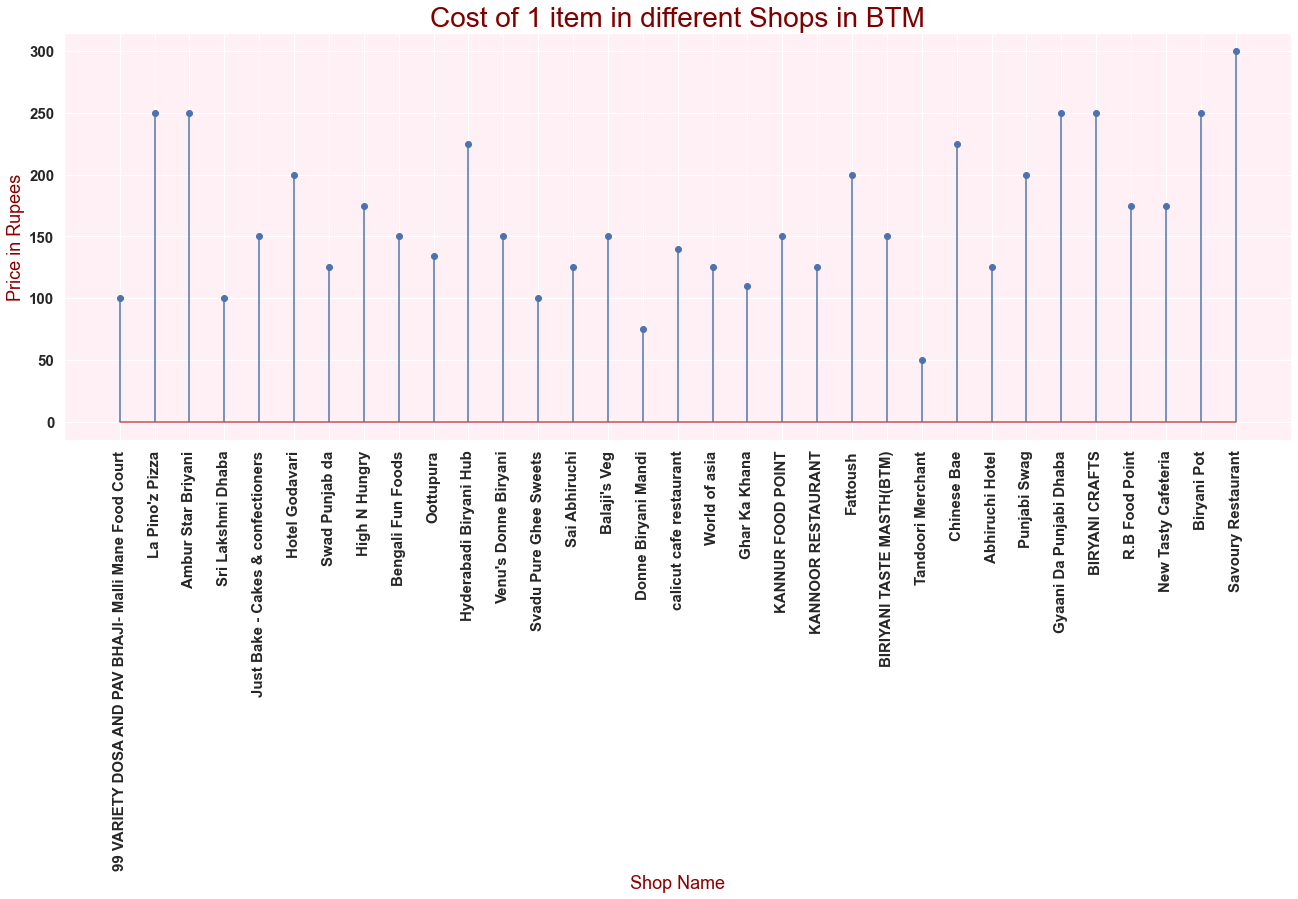

In [ ]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('lavenderblush')
plt.stem('Shop_Name','Cost_for_One',data=BTM)
plt.xticks(rotation=90,fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.title("Cost of 1 item in different Shops in BTM",fontsize=28,color='maroon')
plt.ylabel("Price in Rupees", fontsize = 18,color='darkred')
plt.xlabel("Shop Name", fontsize =18, color='darkred')
plt.show()

## 11) Top 10 Shops in "BTM"

In [ ]:
top_10_by_rating2 = BTM.sort_values('Rating',ascending=False)
top_10_by_rating2.head(10)

,Shop_Name,Cuisine,Rating,Cost_for_One,Area,Area spot
80,Chinese Bae,"Chinese, Thai",4.5,225.0,BTM,BTM
20,Just Bake - Cakes & confectioners,"Desserts, Bakery",4.3,150.0,BTM,BTM 1st stage
33,Oottupura,"Kerala, South Indian",4.3,134.0,BTM,BTM
40,Venu's Donne Biryani,Biryani,4.3,150.0,BTM,Chocolate Factory Road
79,Tandoori Merchant,"Andhra, Biryani, Chinese, Desserts, Fast Food,...",4.2,50.0,BTM,4th Cross
76,BIRIYANI TASTE MASTH(BTM),"North Indian, South Indian",4.2,150.0,BTM,Btm
66,Ghar Ka Khana,North Indian,4.2,110.0,BTM,BTM
31,Bengali Fun Foods,North Indian,4.2,150.0,BTM,BTM 2nd stage
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese",4.1,100.0,BTM,BTM 2nd Stage
44,Svadu Pure Ghee Sweets,"Desserts, Fast Food, Sweets, Chaat",4.1,100.0,BTM,1st Stage


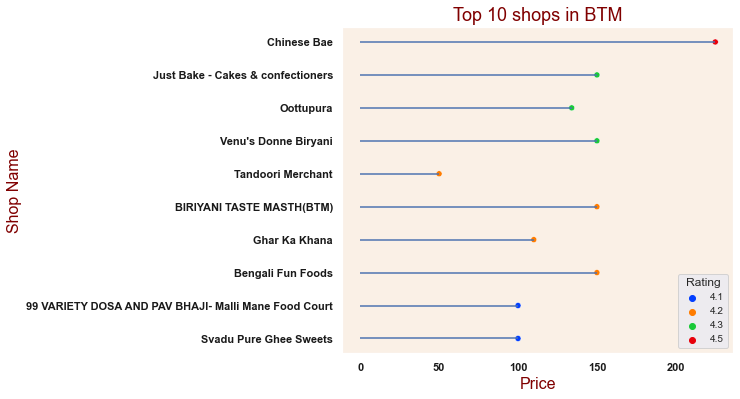

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
a = sns.scatterplot(x='Cost_for_One',y='Shop_Name',hue='Rating',data=top_10_by_rating2.head(10),palette='bright')
plt.hlines(xmin=0,xmax='Cost_for_One',y='Shop_Name',data=top_10_by_rating2.head(10))
a.set_ylabel("Shop Name", fontsize = 16,color='maroon')
a.set_xlabel("Price", fontsize =16, color='maroon')
a.set_title("Top 10 shops in BTM", fontsize =18, color='maroon')
a.set_facecolor('linen')
plt.xticks(rotation = 0,fontsize=11,color='k',fontweight='bold')
plt.yticks(fontsize=11,color='k',fontweight='bold')
plt.legend(loc='lower right',title='Rating',prop={'size': 10})
a.grid(False)
plt.show()

## 12) Rating of all the shops in 'HSR'

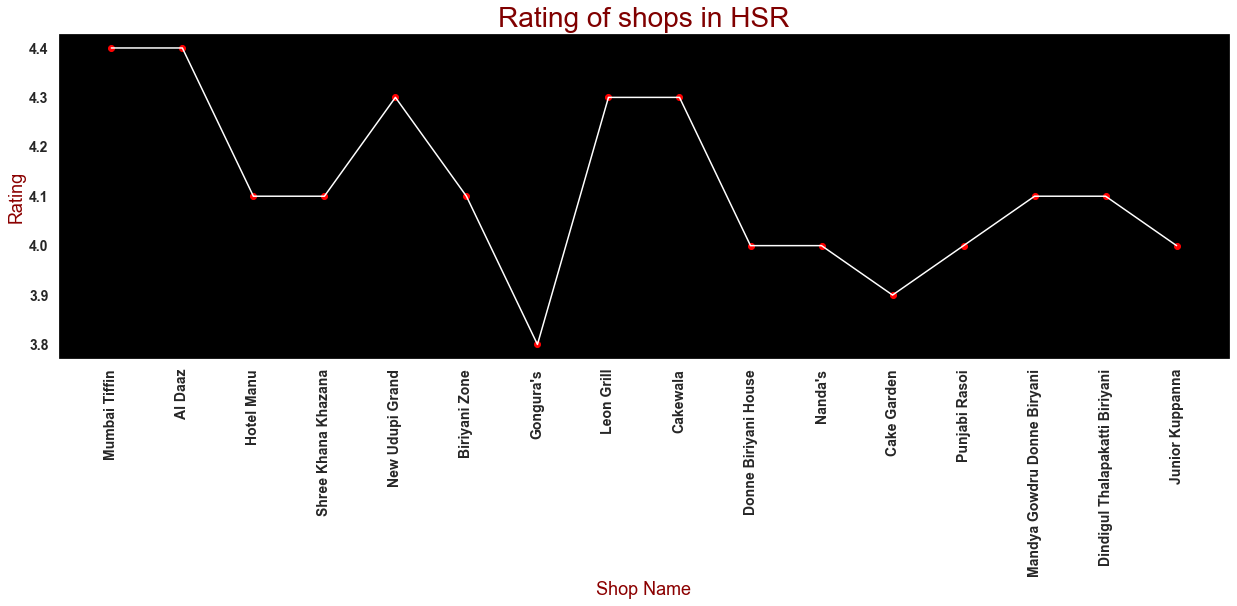

In [ ]:
HSR = df.loc[(df['Area']=='HSR')]
sns.set(rc={'figure.figsize':(21,6)})
fig, ax = plt.subplots()
ax.set_facecolor('black')
plt.plot('Shop_Name','Rating',data=HSR,color='white')
plt.scatter('Shop_Name','Rating',data=HSR,color='red')
plt.xticks(rotation=90,fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')

plt.title("Rating of shops in HSR",fontsize=28,color='maroon')
plt.xlabel("Shop Name", fontsize = 18,color='darkred')
plt.ylabel("Rating", fontsize =18, color='darkred')
plt.grid(False)

##  13) Cost of one item in different shops in HSR

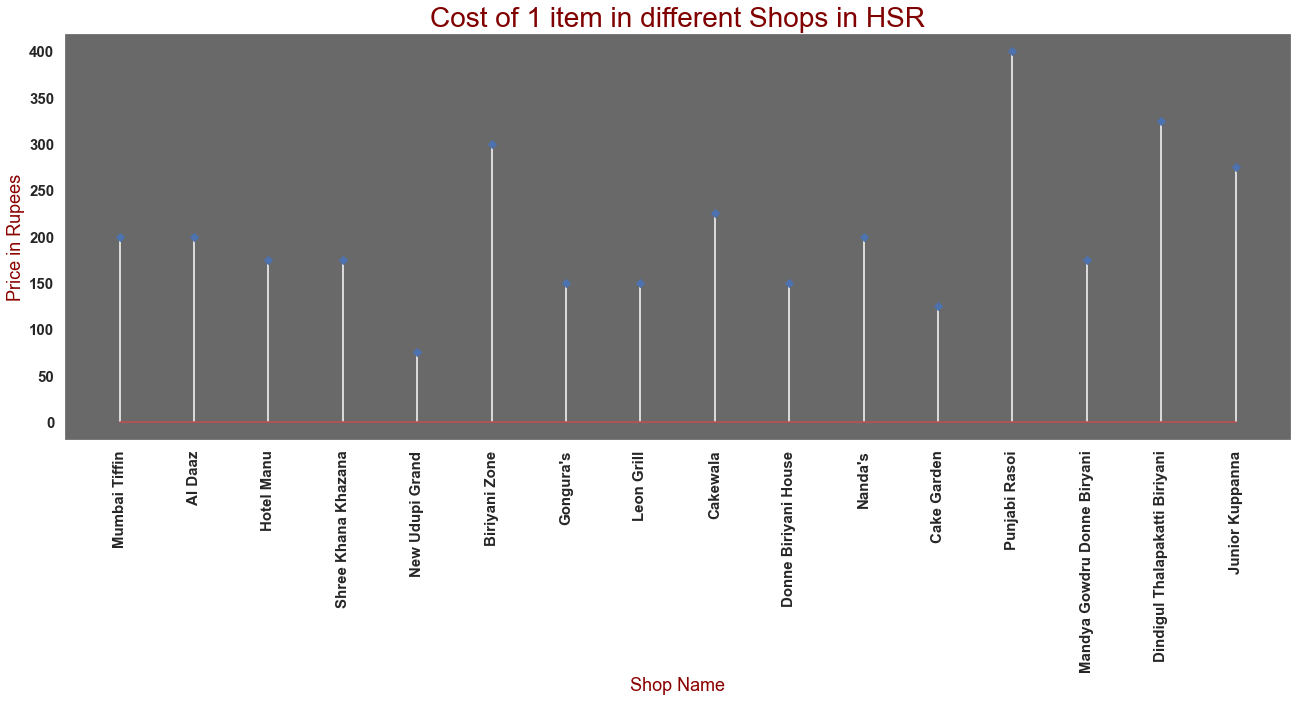

In [ ]:
sns.set(rc={'figure.figsize':(22,7.5)})
fig, ax = plt.subplots()
ax.set_facecolor('dimgrey')
plt.stem('Shop_Name','Cost_for_One',data=HSR,linefmt='white', markerfmt='D')
plt.xticks(rotation=90,fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.title("Cost of 1 item in different Shops in HSR",fontsize=28,color='maroon')
plt.ylabel("Price in Rupees", fontsize = 18,color='darkred')
plt.xlabel("Shop Name", fontsize =18, color='darkred')
plt.grid(False)
plt.show()

## 14) Top 10 Shops in "HSR"

In [ ]:
top_10_by_rating3 = HSR.sort_values('Rating',ascending=False)
top_10_by_rating3.head(10)

,Shop_Name,Cuisine,Rating,Cost_for_One,Area,Area spot
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo",4.4,200.0,HSR,Sector 5
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...",4.4,200.0,HSR,HSR
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian",4.3,75.0,HSR,HSR
39,Leon Grill,"Turkish, Portuguese, American",4.3,150.0,HSR,3rd Sector
41,Cakewala,Desserts,4.3,225.0,HSR,HSR
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian",4.1,175.0,HSR,HSR
19,Shree Khana Khazana,"Indian, Rajasthani",4.1,175.0,HSR,Sector 4
36,Biriyani Zone,"North Indian, Chinese, Biryani",4.1,300.0,HSR,HSR 1st sector
98,Mandya Gowdru Donne Biryani,Biryani,4.1,175.0,HSR,HSR
99,Dindigul Thalapakatti Biriyani,North Indian,4.1,325.0,HSR,HSR


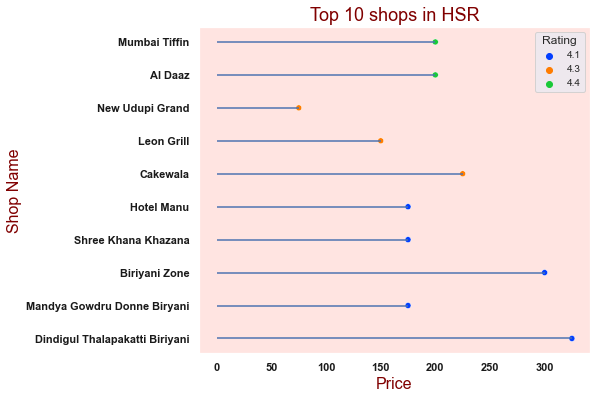

In [ ]:
sns.set(rc={'figure.figsize':(7,6)})
a = sns.scatterplot(x='Cost_for_One',y='Shop_Name',hue='Rating',data=top_10_by_rating3.head(10),palette='bright')
plt.hlines(xmin=0,xmax='Cost_for_One',y='Shop_Name',data=top_10_by_rating3.head(10))
a.set_ylabel("Shop Name", fontsize = 16,color='maroon')
a.set_xlabel("Price", fontsize =16, color='maroon')
a.set_title("Top 10 shops in HSR", fontsize =18, color='maroon')
a.set_facecolor('mistyrose')
plt.xticks(rotation = 0,fontsize=11,color='k',fontweight='bold')
plt.yticks(fontsize=11,color='k',fontweight='bold')
plt.legend(loc='upper right',title='Rating',prop={'size': 10})
a.grid(False)
plt.show()

## 15) Top 10 Mostly available Cuisines.

In [ ]:
cuisine = df['Cuisine'].value_counts().sort_values(ascending=False).head(10)
cuisine = cuisine.reset_index().rename(columns={'index':'Cuisine','Cuisine':'No. of Shops'})
cuisine

,Cuisine,No. of Shops
0,North Indian,12
1,Desserts,5
2,Chinese,4
3,Biryani,4
4,"Andhra, Biryani",3
5,"American, Fast Food",3
6,South Indian,3
7,"North Indian, South Indian",3
8,"North Indian, Chinese, Biryani",3
9,"Desserts, Bakery",2


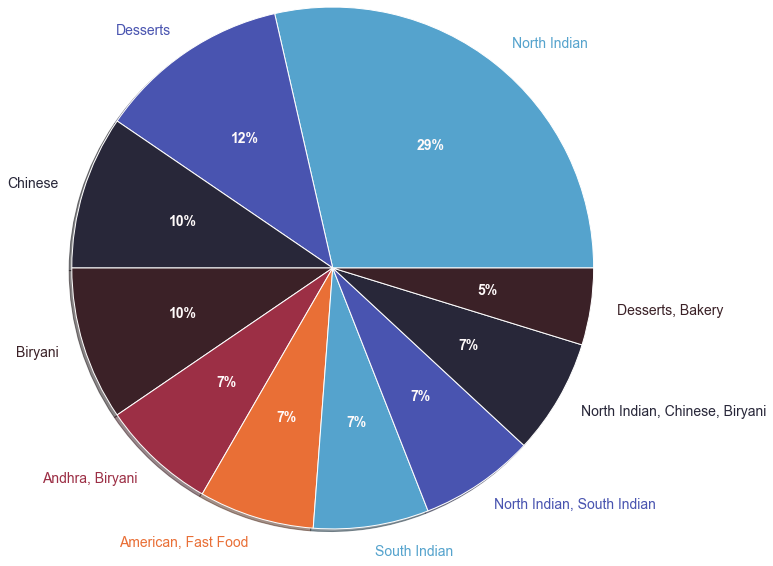

In [ ]:
colors = sns.set_palette('icefire')
patches,text, pcts= plt.pie(x='No. of Shops',labels='Cuisine',autopct='%1.0f%%',data=cuisine,colors=colors,
                            radius=2,shadow=True,textprops={'fontsize': 14})
for i, patch in enumerate(patches):
    text[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='snow',fontweight='bold')
plt.show()

> * 'North Indian' Cuisine is mostly available in Bangalore swiggy.
> * 'Desserts', 'Chinese', 'Biryani' are also famous in Bangalore swiggy.

## 16) Correlation for Rating & Price

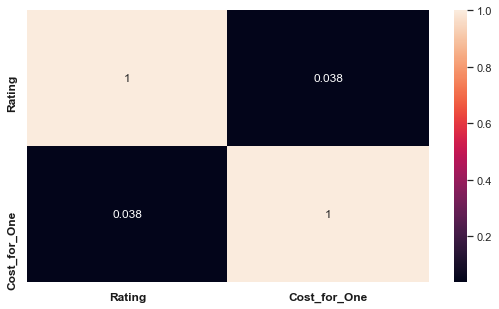

In [ ]:
sns.set(rc={'figure.figsize':(9,5)})
sns.heatmap(df.corr(),annot=True)
plt.xticks(fontsize=12,color='k',fontweight='bold')
plt.yticks(fontsize=12,color='k',fontweight='bold')
plt.show()

>  * Correlation ranges from -1 to +1, Values closer to zero means there is no linear relationship between the two variables.
>  * The values near to 1 are more positively correlated i.e, if one variable increases the other also increases.
>  * The values near to -1 are more negatively correlated i.e, if one variable increases the other decreases.


> * Koramangala area has more number of shops with a total of 63 shops.
> * 'BTM' location is 2nd with 33 shops, followed by 'HSR' with 16 shops.
> * Khichdi Experiment shop has highest rating of 4.8 and has a best price of 100 Rupees per one item, it is located in Koramangala.
> * Based on ratings, top 10 shops are located in BTM,HSR & Koramangala.
> * Only North Indian Cusine is mostly available in 12+ shops.


#### In KORAMANGALA location, 
> * 'Khicidi Experiment' is the shop with best rating of 4.8 and price per one item is 100 rupees.
> * 'Kanti Sweets' shop has less price of 75 Rupees, with a rating of 4.3
> * 'Taco Bell' has a highest price of 300 rupees with a rating of 4.3

#### In BTM location, 
> * 'Chinese Bae' is the shop with highest price of 225 rupees and its rating is 4.5.
> * 'Tandoori Merchant' shop has less price of 50 Rupees, with a rating of 4.2
> * '99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food' & 'Svadu Pure Ghee Sweet' has a price of 100 rupees with a rating of 4.1

#### In HSR location, 
> * 'Mumbai Tiffin' & 'AI Daaz' have best rating of 4.4 and price is around 200 Rupees.
> * 'New Udipi Grand' has least price of around 100 Rupees, with best rating of 4.3
> * 'Dindigul Thalapakatti Biriyani' shop has high price, with a rating of 4.1